In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [83]:
def lorenz(state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x*y - beta*z
    return dx_dt, dy_dt, dz_dt

In [84]:
def euler(state, dt, sigma, rho, beta):
    x, y, z = state
    f_x, f_y, f_z = lorenz(state, sigma, rho, beta)

    x += dt * f_x
    y += dt * f_y
    z += dt * f_z

    return x, y, z

In [85]:
#initial conditions
x0, y0, z0 = 0.,1.,0.8
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
t, dt = 0, 0.01
#integration loop
x_list = []
y_list = []
z_list = []
for i in range(10000):
    x, y, z = euler(initial_state, dt, sigma, rho, beta)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    initial_state = [x, y, z ]
    t += dt

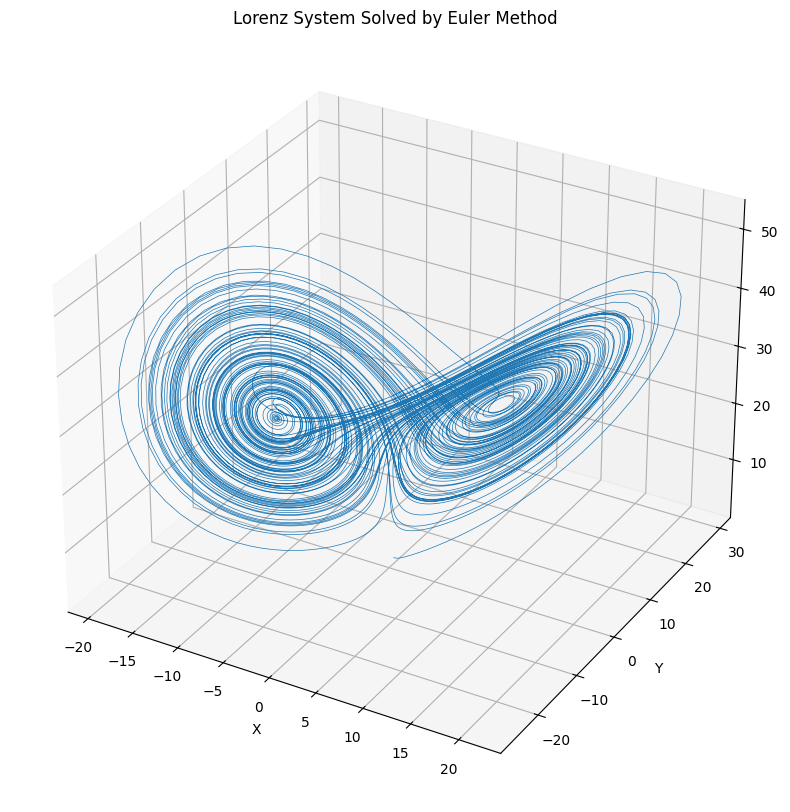

In [86]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(x_list, y_list, z_list, lw=0.5)
ax.set_title("Lorenz System Solved by Euler Method")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [87]:
def runge_kutta(state, dt, sigma, rho, beta):
    x, y, z = state
    f1_x, f1_y, f1_z = lorenz(state, sigma, rho, beta)

    f2_x, f2_y, f2_z = lorenz([x + 0.5*dt * f1_x, y + 0.5*dt * f1_y, z + 0.5*dt * f1_z], sigma, rho, beta)

    f3_x, f3_y, f3_z = lorenz([x + 0.5*dt * f2_x, y + 0.5*dt * f2_y, z + 0.5*dt * f2_z], sigma, rho, beta)

    f4_x, f4_y, f4_z = lorenz([x + dt * f3_x, y + dt * f3_y, z + dt * f3_z], sigma, rho, beta)

    x += (dt * f1_x + 2*dt * f2_x + 2*dt * f3_x + dt * f4_x) / 6.0
    y += (dt * f1_y + 2*dt * f2_y + 2*dt * f3_y + dt * f4_y) / 6.0
    z += (dt * f1_z + 2*dt * f2_z + 2*dt * f3_z + dt * f4_z) / 6.0

    return x, y, z

In [88]:
#initial conditions
x0, y0, z0 = 1, 1, 1
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
t, dt = 0, 0.01
#integration loop
x_list = []
y_list = []
z_list = []
for i in range(10000):
    x, y, z = runge_kutta(initial_state, dt, sigma, rho, beta)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    initial_state = [x, y, z ]
    t += dt

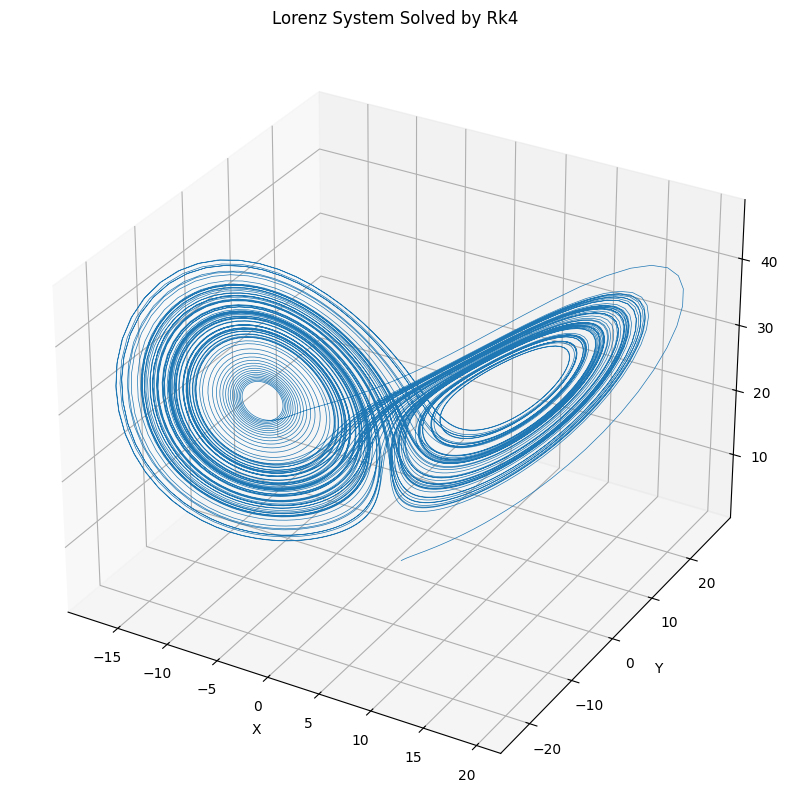

In [89]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(x_list, y_list, z_list, lw=0.5)
ax.set_title("Lorenz System Solved by Rk4")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [90]:
def runge_kutta_adaptive( t0, state, t_end, tol, sigma, rho, beta):
    x, y, z = state
    #integration loop
    x_list = [x]
    y_list = [y]
    z_list = [z]
    t = t0

    h = 0.01  # initial step size
    while t < t_end:
        y1 = runge_kutta([x_list[-1], y_list[-1], z_list[-1]], h, sigma, rho, beta)
        y2 = runge_kutta([x_list[-1], y_list[-1], z_list[-1]], h, sigma, rho, beta)
        error = max(abs(y2[i] - y1[i]) for i in range(len(y1)))
        if error < tol:
            x_list.append(y2[0])
            y_list.append(y2[1])
            z_list.append(y2[2])
            t += h
        if error != 0:
            h = min(h * (tol / error) ** 0.2, t_end - t)
    return x_list,y_list,z_list,t

In [91]:
#initial conditions
x0, y0, z0 = 1, 1, 1
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
# Conditions initiales
t0 = 0.0

# Temps final
t_end = 60.0

# Tolérance d'erreur
tol = 1e-6
x, y, z,t = runge_kutta_adaptive(t0, initial_state, t_end, tol, sigma, rho, beta)

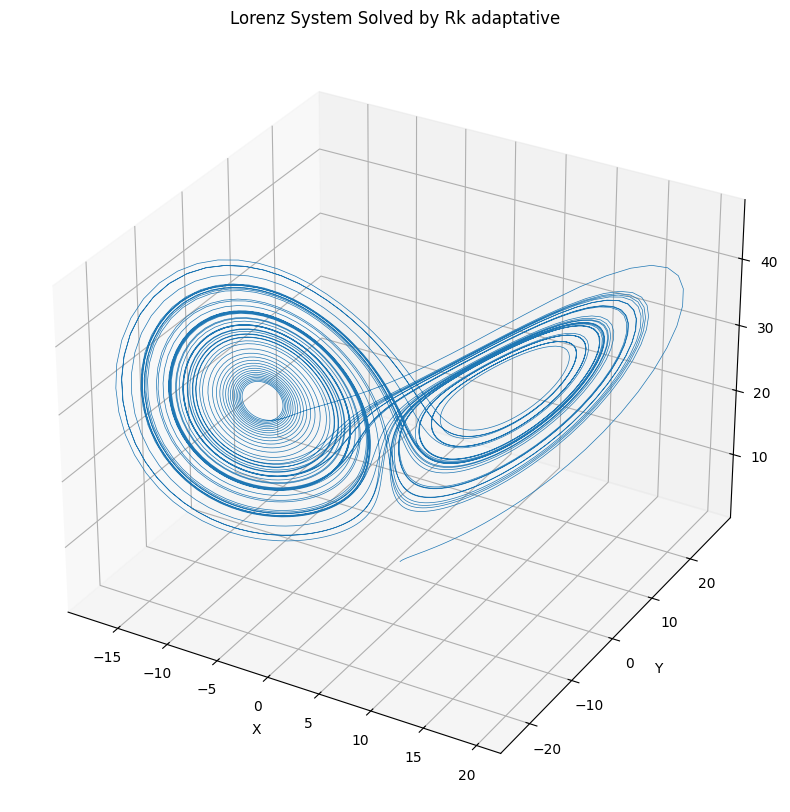

In [92]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz System Solved by Rk adaptative")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

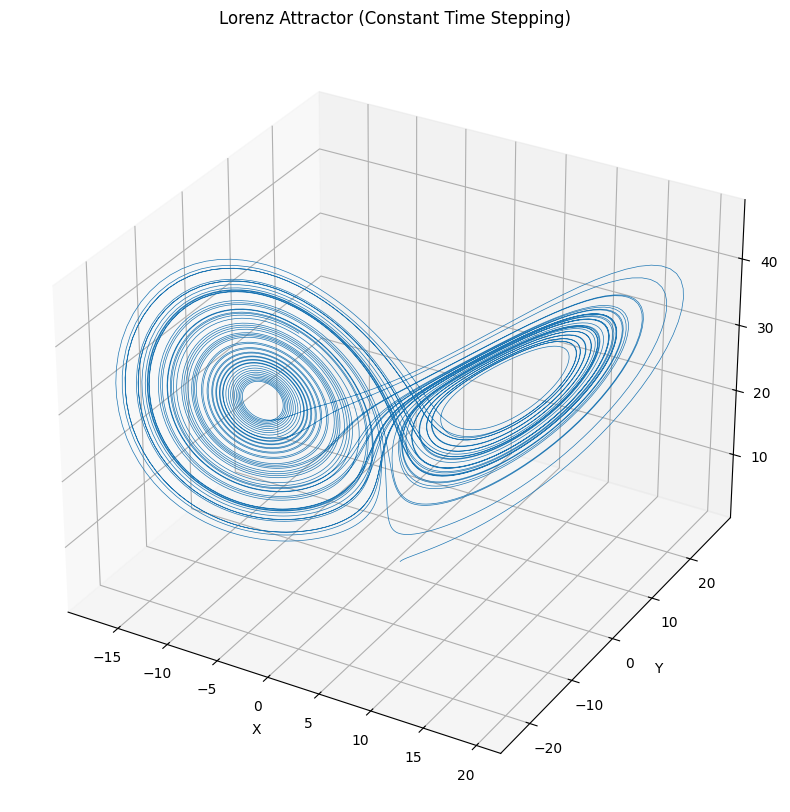

(10000, 3)


In [93]:
# odeint(func, y0, t, args=()), func(y, t, ...)
# Define the Lorenz ODE system
def lorenz_odeint(state, t, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

# Initial conditions
x0, y0, z0 = 1.0, 1.0, 1.0
initial_state = [x0, y0, z0]

# Model parameters
sigma = 10.0
rho = 28.0
beta = 8/3

# Solve the Lorenz ODE system with constant time stepping
t_span = (0, 60)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
sol = odeint(lorenz_odeint, initial_state, t_eval, args=(sigma, rho, beta))

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (Constant Time Stepping)')
plt.show()
print(sol.shape)

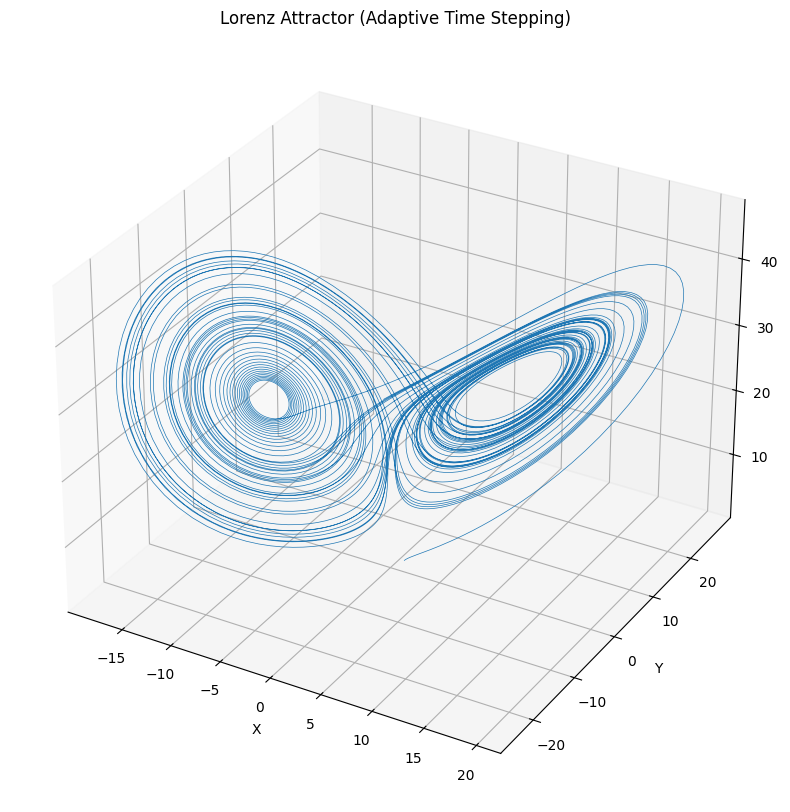

(3, 5884)


In [94]:
def lorenz_solve_ivp(t, state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz
# Initial conditions
x0, y0, z0 = 1.0, 1.0, 1.0
initial_state = [x0, y0, z0]

# Model parameters
sigma = 10.0
rho = 28.0
beta = 8/3

# Solve the Lorenz ODE system with adaptive time stepping
t_span = (0, 60)
sol = solve_ivp(lorenz_solve_ivp, t_span, initial_state, args=(sigma, rho, beta), rtol=1e-8, atol=1e-8)

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (Adaptive Time Stepping)')
plt.show()
print(sol.y.shape)

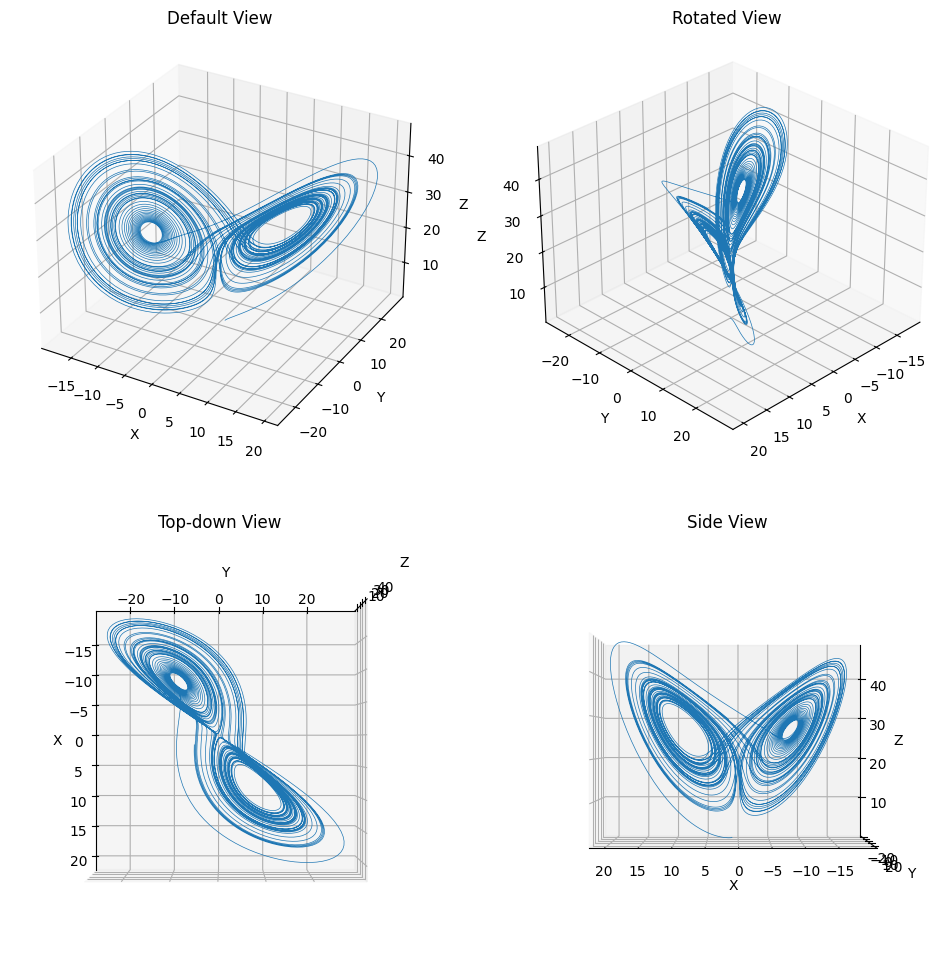

In [95]:
# Plot the Lorenz attractor in 3D from different angles
fig = plt.figure(figsize=(12, 12))

# Plot 1: Default view
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax1.set_title('Default View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot 2: Rotated view
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax2.view_init(elev=30, azim=45)
ax2.set_title('Rotated View')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot 3: Top-down view
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax3.view_init(elev=90, azim=0)
ax3.set_title('Top-down View')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Plot 4: Side view
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax4.view_init(elev=0, azim=90)
ax4.set_title('Side View')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.show()

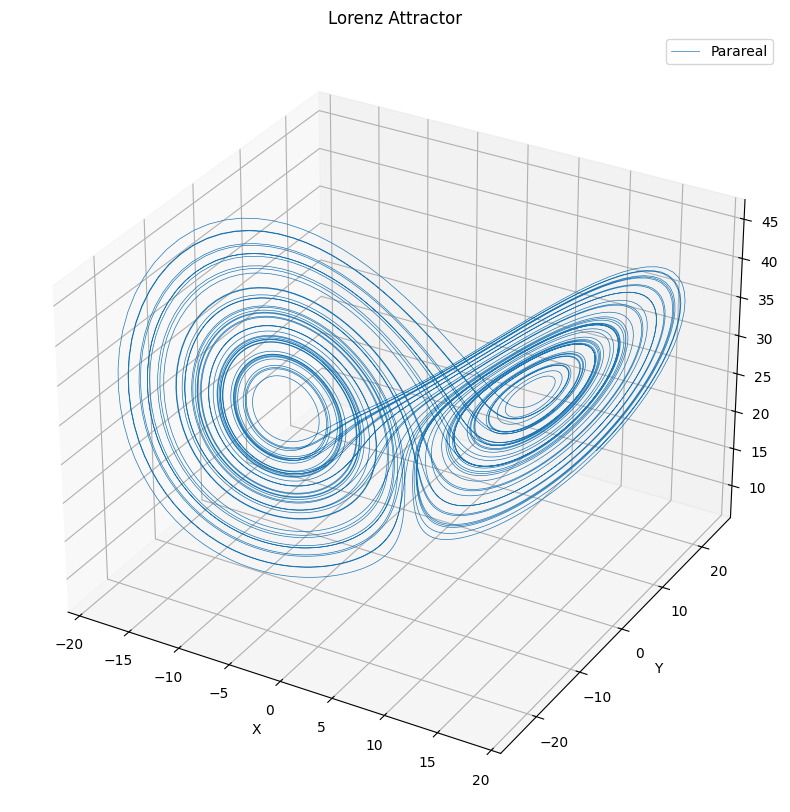

In [96]:
def lorenz_f(x, y, z, sigma=10, rho=28, beta=8/3):
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return dxdt, dydt, dzdt

def euler_step(f, x, y, z, dt):
    dxdt, dydt, dzdt = f(x, y, z)
    x += dxdt * dt
    y += dydt * dt
    z += dzdt * dt
    return x, y, z


def parareal(f, x0, y0, z0, t, dt, max_iterations=100, tolerance=1e-6):
    x, y, z = x0, y0, z0
    coarse_solution = np.zeros((len(t), 3))
    coarse_solution[0] = [x, y, z]
    for i in range(1, len(t)):
        x, y, z = euler_step(f, x, y, z, dt)
        coarse_solution[i] = [x, y, z]
    u = coarse_solution
    
    fine_solution=np.empty_like(u)
    iteration = 0
    while iteration < max_iterations:
        u_prev = u.copy()
        coarse_solution_prev=coarse_solution.copy()
        
        x, y, z = u[0]
        fine_solution[0] = [x, y, z]
        for i in range(1, len(t)):
            x, y, z = euler_step(f, x, y, z, dt)
            fine_solution[i] = [x, y, z]
        
        coarse_solution[0] = [x, y, z]
        for i in range(1, len(t)):
            x, y, z = euler_step(f, x, y, z, dt)
            coarse_solution[i] = [x, y, z]
            u[i] = coarse_solution[i] + fine_solution[i] - coarse_solution_prev[i]

        if np.all(np.abs(u - u_prev) < tolerance):
            break

        iteration += 1
    
    return coarse_solution

# Set up time points and initial conditions
t = np.linspace(0, 60, 10000)
x0, y0, z0 = 1, 1, 1
dt = t[1] - t[0]

# Solve the Lorenz system using Parareal algorithm
solution_parareal = parareal(lorenz_f, x0, y0, z0, t, dt)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution_parareal[:, 0], solution_parareal[:, 1], solution_parareal[:, 2], label='Parareal', lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.legend()
plt.show()
